
## **<center>Linear Problem OLS using Statsmodels </center>**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>
  - **5.2** [**Post-Profiling Report**](#Section52)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Feature Extraction**](#Section71)<br>
  - **7.2** [**Feature Transformation**](#Section72)<br>
  - **7.3** [**Feature Scaling**](#Section73)<br>
  - **7.4** [**Data Preparation**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

- **Linear Regression** is a machine learning algorithm based on supervised learning.

- It is mostly used for finding out the **relationship** between **features** and **forecasting (or target) variable**.

- This regression technique finds out a **linear relationship** between x (input) and y (output). Hence, the name is Linear Regression.

<center><img src="https://dphi.tech/blog/wp-content/uploads/2020/04/example-regression-simulation.gif" width=50%></center>


- Linear regression can be denoted by the equation: 
<center><h4>$y$= $b0$ + $b1$ * $X$</h4></center>

- So if **salary** is a **linearly dependent** on number of **years of experience**, we can **predict someone's salary** using the equation:

<center><h4>$salary$= $b0$ + $b1$ * $years\_of\_experience$</h4></center>

---
<a name = Section2></a>
# **2. Problem Statement**
---

- A famous car dealer - **LinReg Cars** has recently seen some **decline** in their car **sales**.

- They need to find the causes of the decline and want to estimate the future sales volume for their dealership.

- They have hired you - a **data scientist** to **analyze** their previous **sales volume data**.

- Your objective is to **find** which **features** have more **impact** on **car sales** and provide information on it.

- Additionally, you have to **train** a **regression** model to **predict** car **sales** and **check the accuracy** of your **model's predictions**.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
# !pip install -q datascience                                                       # Package that is required by pandas profiling
# !pip install -q pandas-profiling  

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.



In [2]:
# !pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                               # Importing for panel data analysis
#from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis) 
#pd.set_option('display.max_columns', None)                                        # Unfolding hidden features if the cardinality is high      
#pd.set_option('display.max_colwidth', None)                                       # Unfolding the max feature width for better clearity      
#pd.set_option('display.max_rows', None)                                           # Unfolding hidden data points if the cardinality is high
#pd.set_option('display.float_format', lambda x: '%.5f' % x)                       # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                                # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                   # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                                             # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part 
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing.                             
from sklearn.linear_model import LinearRegression                                 # Importing Linear Regression model
from sklearn.metrics import mean_squared_error                                    # To calculate the MSE of a regression model
from sklearn.metrics import mean_absolute_error                                   # To calculate the MAE of a regression model
from sklearn.metrics import r2_score                                              # To calculate the R-squared score of a regression model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                   # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")     

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This data set is being taken from the **Analytixlabs** for the purpose of **prediction**.


</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 156 | 16 | 16.0 KB | 

</br>
													

|Id|Feature|Description|
|:--|:--|:--|
|01|**Manufacturer**| Manufacturer Name |
|02|**Model**| Model name of the car |
|03|**Sales_in_thousands**| Number of sales per thousand |
|04|**_year_resale_value**| Resale value |
|05|**Vehicle_type**| Type of vehicle - Passenger or Car |
|06|**Price_in_thousands**| Price of vehicle in thousands of dollars |
|07|**Engine_size**| Volume of the cylinder |
|08|**Horsepower**| Horsepower refers to the power an engine produces |
|09|**Wheelbase**| The distance between the end axles of a vehicle|
|10|**Width**| Width of the vehicle |
|11|**Length**| Length of the vehicle |
|12|**Curb_weight**| Weight of the vehicle without any passenger |
|13|**Fuel_capacity**| Fuel tank capacity |
|14|**Fuel_efficiency**| Fuel efficiency (gallon / miles) |
|15|**Latest_Launch**| Date of launch of latest model version |
|16|**Power_perf_factor**| Power Performance Factor |

**NOTE**: You can use this **[link](https://docs.google.com/document/d/1Cz6X7CRN-7EBNlt7wrMVqMsVpenLfu4r2UG-JE01jJs/edit?usp=sharing)** as a reference for feature description


In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\Hemant Kshirsagar\\Machine Learning'

In [6]:
os.chdir('C:/Users/Hemant Kshirsagar/Downloads')

In [7]:
# importing data and checking the shape and head
mob_price = pd.read_csv("Cellphone.csv")
print('Data Shape:', mob_price.shape)
mob_price.head()

Data Shape: (161, 14)


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [8]:
mob_price.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [9]:

mob_price.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [10]:
mob_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [11]:
mob_price.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

- We will be dropping Product_id column as its not necessary 

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

In [12]:
# Droping the Product_id column as its having less imporatance in analysis
mob_price.drop('Product_id', axis =1, inplace = True )

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [13]:
#Checking the data again
print('Data Shape:', mob_price.shape)
mob_price.head()

Data Shape: (161, 13)


,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [14]:
# Checked for the duplicated. There are no duplicated values in dataset
mob_price.duplicated().sum()

0

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**Lets check the distribution of the target feature.**


<AxesSubplot:xlabel='Price', ylabel='Count'>

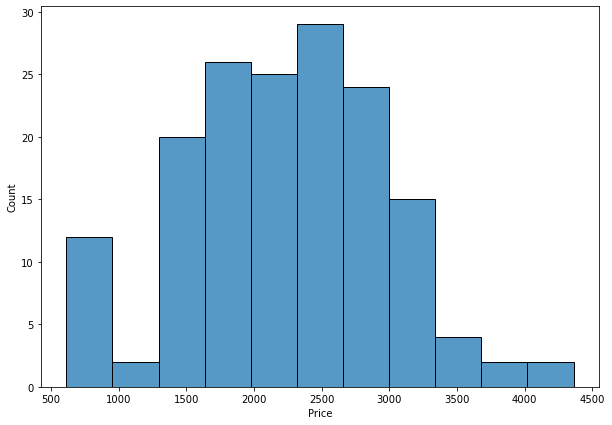

In [15]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize = [10,7])
# Plotting the hist plot using the seaborn
sns.histplot(mob_price['Price'])


<AxesSubplot:ylabel='Frequency'>

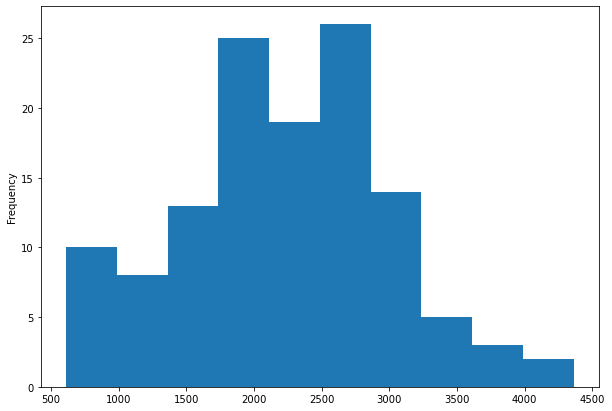

In [16]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize = [10,7])
mob_price.groupby(by = 'Sale')['Price'].mean().plot.hist()



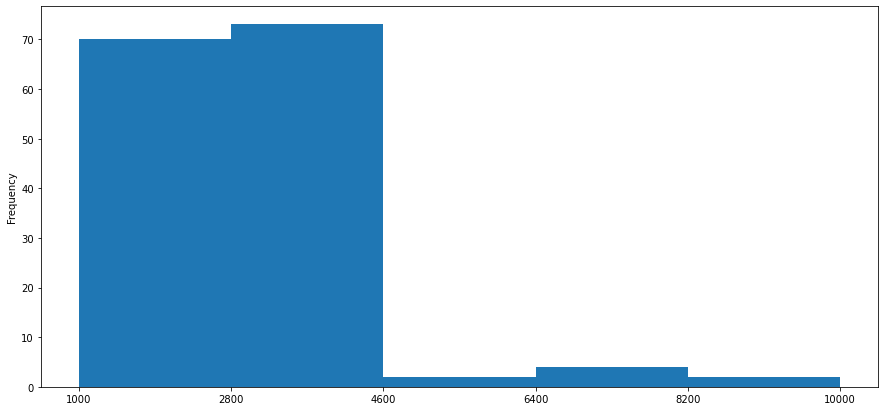

In [17]:
figure = plt.figure(figsize = [15,7])

n_bins = 5
my_bins = np.linspace(1000,10000,n_bins+1)
mob_price['battery'].plot.hist(bins = my_bins)

plt.xticks(ticks = my_bins)

plt.show()

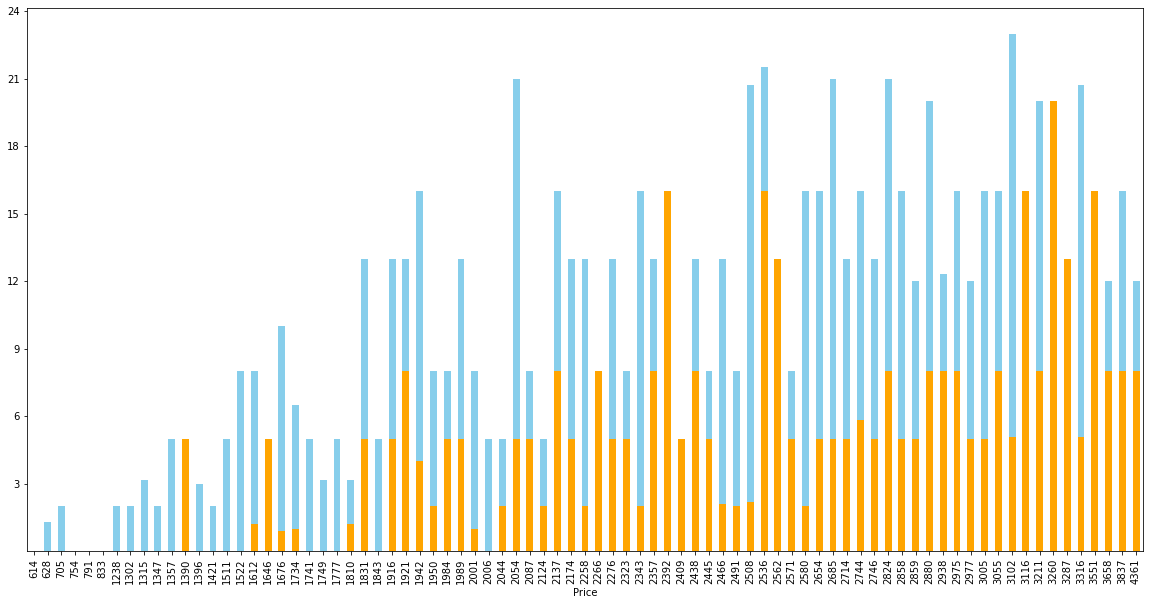

In [18]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize = [20,10])
mob_price.groupby(by = 'Price')['RearCam'].mean().plot.bar(color = 'SkyBlue')
mob_price.groupby(by = 'Price')['Front_Cam'].mean().plot.bar(color = 'Orange')
plt.yticks(ticks= np.arange(3,26,3))



plt.show()


<AxesSubplot:xlabel='weight', ylabel='thickness'>

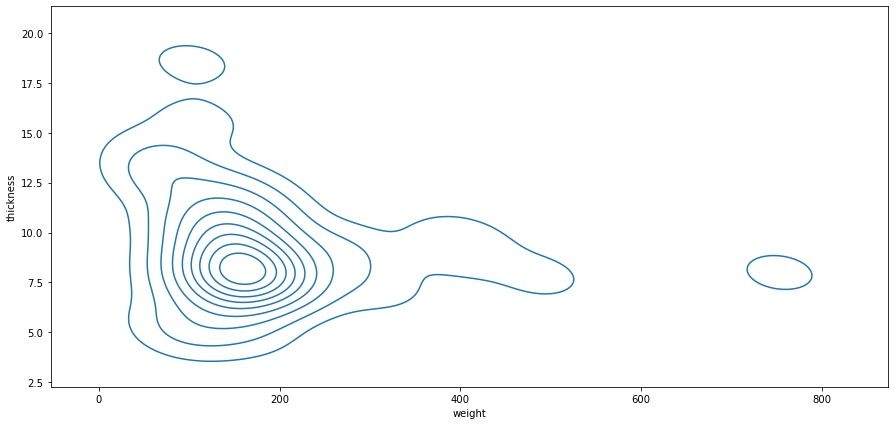

In [19]:
figure = plt.figure(figsize = [15,7])

sns.kdeplot(data=mob_price,x='weight', y='thickness')

<AxesSubplot:xlabel='Price'>

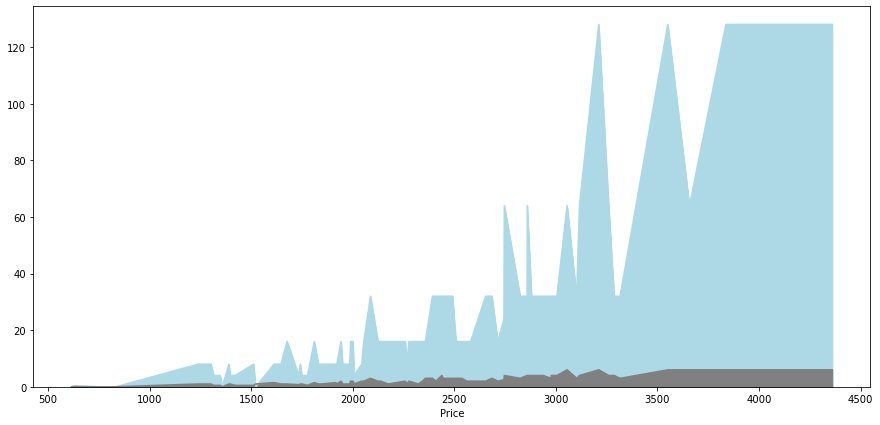

In [20]:
figure = plt.figure(figsize = [15,7])
mob_price.groupby(by = 'Price')['internal mem'].mean().plot.area(color ='Lightblue')
mob_price.groupby(by = 'Price')['ram'].mean().plot.area(color ='Grey')

<AxesSubplot:xlabel='Price', ylabel='Count'>

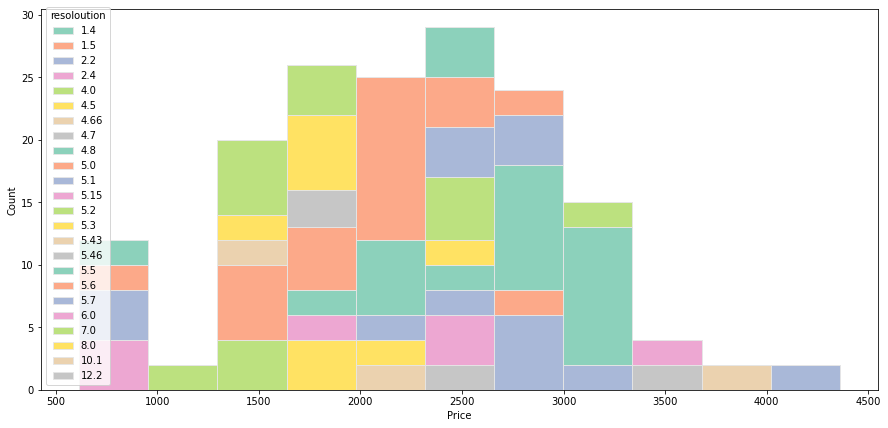

In [21]:
figure = plt.figure(figsize = [15,7])

sns.histplot(mob_price,x="Price", hue="resoloution", multiple="stack", palette="Set2", edgecolor=".9",linewidth=.9)

#mob_price['resoloution'].plot.kde()


<AxesSubplot:>

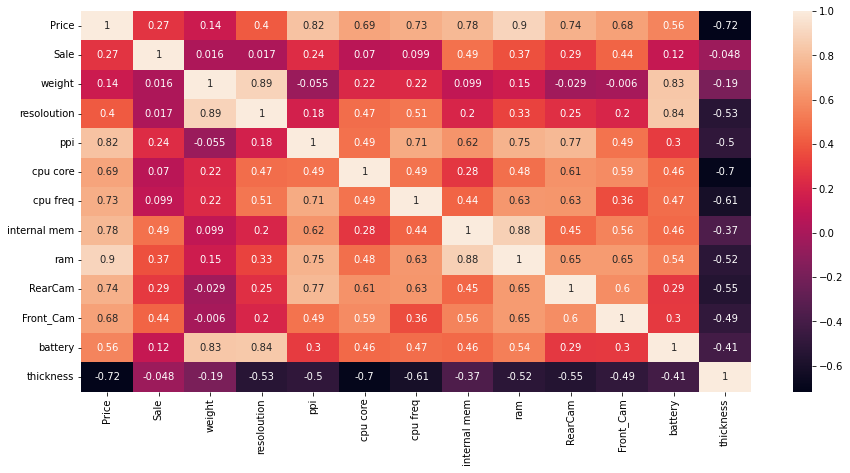

In [22]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])
sns.heatmap(mob_price.corr(),annot=True, cmap='rocket')

# OLS using Statsmodels

**OLS stands for ordinary least squares. OLS is heavily used in econometrics—a branch of economics where statistical methods are used to find the insights in economic data.**

**OLS is an estimator in which the values of m and c (from the above equation) are chosen in such a way as to minimize the sum of the squares of the differences between the observed dependent variable and predicted dependent variable. That’s why it’s named ordinary least squares.**

**when the sum of the squares of the differences is minimum, the loss is also minimum—hence the prediction is better.**

In [23]:
X = mob_price.drop('Price', axis =1)
X.head()

,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [24]:
y = mob_price.Price
y.head()

0    2357
1    1749
2    1916
3    1315
4    1749
Name: Price, dtype: int64

In [25]:
import statsmodels.api as sm

In [26]:
model = sm.OLS(y, X).fit()
model_prediction = model.predict(X) 

model_details = model.summary()
print(model_details)

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1743.
Date:                Sat, 04 Feb 2023   Prob (F-statistic):                   1.42e-153
Time:                        22:33:58   Log-Likelihood:                         -1079.2
No. Observations:                 161   AIC:                                      2182.
Df Residuals:                     149   BIC:                                      2219.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [50]:
linreg.coef = ([-0.0206, -3.7759, 188.8695, 1.3317, 72.9829, 78.7774, 6.6396, 101.6626, -1.2634, 7.6593, 0.1289, 21.0273])

In [51]:
print(linreg.coef)

[-0.0206, -3.7759, 188.8695, 1.3317, 72.9829, 78.7774, 6.6396, 101.6626, -1.2634, 7.6593, 0.1289, 21.0273]


**Plotting of coef derived from ordinary least squares** 

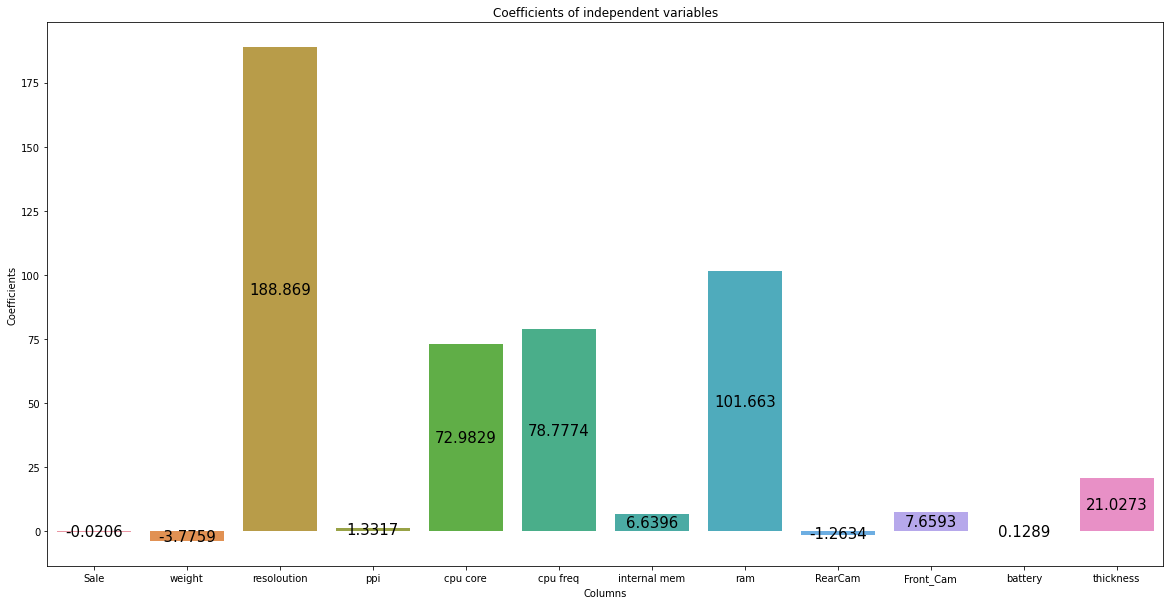

In [52]:
column_names = X.columns
column_coef = pd.DataFrame({"columns" : column_names,
             "coef_": linreg.coef})

plt.figure(figsize = (20,10))

viz = sns.barplot(data = column_coef, x = "columns", y = "coef_")

plt.bar_label(viz.containers[0],size=15,label_type="center")

plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel("Columns",size = 10)
plt.ylabel("Coefficients",size = 10)
plt.title("Coefficients of independent variables")
plt.show()

In [27]:
Scaler = StandardScaler().fit(mob_price)

mob_price_scaled = Scaler.transform(mob_price)


In [28]:
mob_price = pd.DataFrame(mob_price_scaled)
mob_price.columns = ['Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness']
mob_price.head()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,0.184649,-0.396590,-0.382572,-0.006602,0.661751,1.289952,-0.255608,-0.296070,0.495385,0.425444,0.807868,-0.170327,-0.696211
1,-0.609294,-0.396590,-0.490564,-0.803808,-0.759303,-1.172684,-0.339231,-0.713968,-0.750857,-1.172970,-1.040327,-0.838100,0.447564
2,-0.391221,-0.396590,-0.652552,-0.338771,-0.171538,-0.351805,-0.506479,-0.574669,-0.439297,0.425444,0.114795,-0.617955,-0.604709
3,-1.176024,-0.395942,-0.560759,-0.803808,-0.759303,-1.172684,-0.339231,-0.713968,-1.054940,-1.172970,-1.040327,-1.058245,0.950825
4,-0.609294,-0.395942,-0.490564,-0.803808,-0.759303,-1.172684,-0.339231,-0.713968,-0.750857,-1.172970,-1.040327,-0.838100,0.447564


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (128, 12)
y_train shape: (128,)
X_test shape: (33, 12)
y_test shape: (33,)


In [30]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [31]:
print ('Intercept:',linreg.intercept_)
print ('Coefficients:',linreg.coef_)

Intercept: 1797.2504483740763
Coefficients: [-2.22907579e-02 -4.11411359e-01 -6.58564767e+01  1.11925278e+00
  4.81630797e+01  1.04739247e+02  6.84860702e+00  8.14175383e+01
  4.32982535e+00  9.37505015e+00  1.20698298e-01 -7.84837454e+01]


In [47]:
X_cols = X.columns

In [32]:
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [48]:
eq1 = zip(X_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Sale 1797.2504483740763
weight -0.02229075793081834
resoloution -0.41141135948520124
ppi -65.85647668776592
cpu core 1.1192527795738079
cpu freq 48.16307966466641
internal mem 104.73924689187594
ram 6.848607020976986
RearCam 81.41753832540292
Front_Cam 4.32982534702848
battery 9.37505014529196
thickness 0.12069829757198007


**Plotting of coef derived from Linerar Regression** 

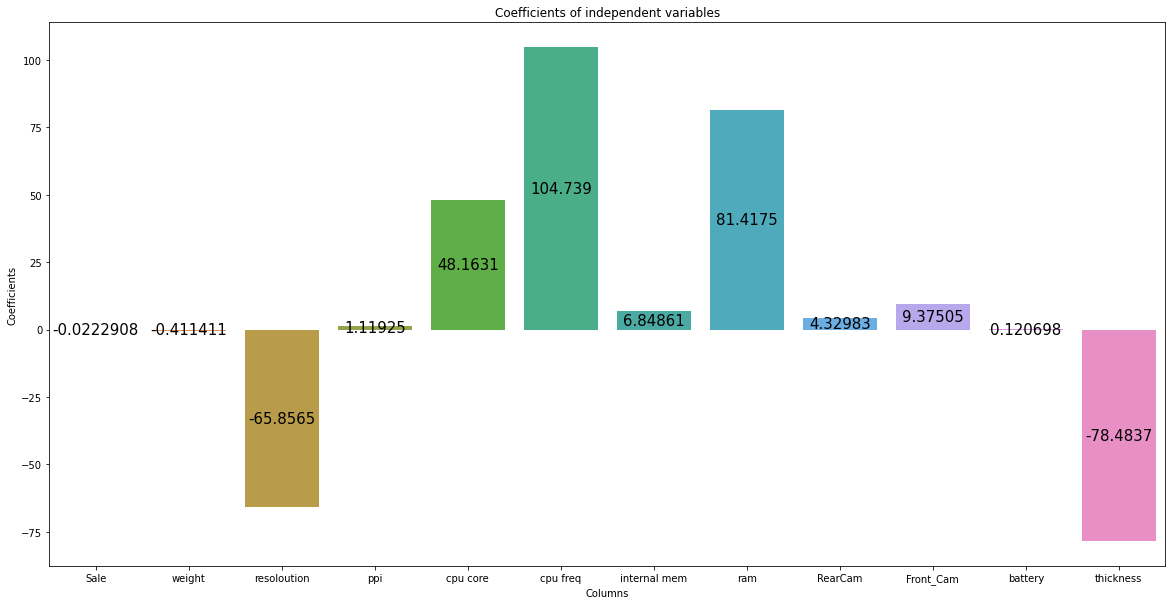

In [53]:
column_names = X.columns
column_coef = pd.DataFrame({"columns" : column_names,
             "coef_": linreg.coef_ })

plt.figure(figsize = (20,10))

viz = sns.barplot(data = column_coef, x = "columns", y = "coef_")

plt.bar_label(viz.containers[0],size=15,label_type="center")

plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel("Columns",size = 10)
plt.ylabel("Coefficients",size = 10)
plt.title("Coefficients of independent variables")
plt.show()

In [34]:
y_pred_train = linreg.predict(X_train)

In [35]:
y_pred_test = linreg.predict(X_test)

Text(0, 0.5, 'Predicted Values')

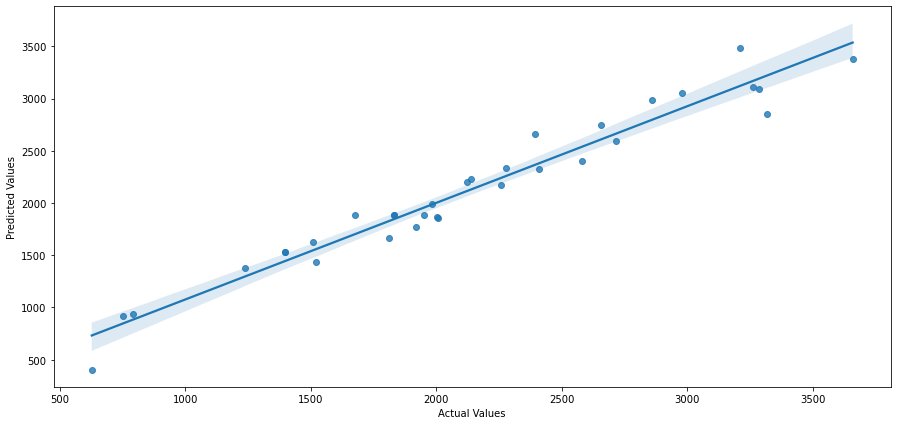

In [37]:
plt.figure(figsize= (15,7))
sns.regplot(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [38]:
from sklearn import metrics

In [39]:
#Computing the MAE for our Sales predictions
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [40]:
print ('Mae for the training is {}'.format(MAE_train))
print ('Mae for the test is {}'.format(MAE_test))

Mae for the training is 136.11983095593305
Mae for the test is 142.33353538715346


#### Computing the MSE for our Sales predictions

In [41]:

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [42]:
print ('MSE for the training is{}'.format(MSE_train))
print ('MSE for the test is{}'.format(MSE_test))

MSE for the training is27192.36926698868
MSE for the test is27575.599815168986


#### Computing the RMSE for our Sales predictions

In [43]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt( metrics.mean_squared_error(y_test, y_pred_test))

In [44]:
print('RMSE for the training is {}'.format(RMSE_train))
print('RMSE for the test is {}'.format(RMSE_test))

RMSE for the training is 164.90108934445726
RMSE for the test is 166.05902509399778


### Model Evaluation using R-squared and Adjusted R-squared value

In [45]:
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)

print ('R2 score for training is {}'.format(r2_train))
print ('R2 score for test is {}'.format(r2_test))

R2 score for training is 0.9536945242083958
R2 score for test is 0.9520086347128638


In [46]:
adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('Adjusted R2 for training is {}'.format(adj_r2_train))
print('Adjusted R2 for test is {}'.format(adj_r2_test))

Adjusted R2 for training is 0.9488626484736198
Adjusted R2 for test is 0.923213815540582


**coef_LinearRegression**    **coef_ordinary_least_squares** 
Sale            -0.0206      Sale 1797.2504483740763 
weight          -3.7759      weight -0.02229075793081834
resoloution    188.8695      resoloution -0.41141135948520124
ppi              1.3317      ppi -65.85647668776592
cpu core        72.9829      cpu core 1.1192527795738079
cpu freq        78.7774      cpu freq 48.16307966466641
internal mem     6.6396      internal mem 104.73924689187594
ram            101.6626      ram 6.848607020976986
RearCam         -1.2634      RearCam 81.41753832540292
Front_Cam        7.6593      Front_Cam 4.32982534702848
battery          0.1289      battery 9.37505014529196
thickness       21.0273      thickness 0.12069829757198007

## Conclusion

>Score Achieved OLS Statsmodels :
R-squared: 0.993
Adj. R-squared: 0.992

>Score Achieved LinearRegression :
R2 score for test is 0.952
Adjusted R2 for test is 0.9232